***

<center><u><H1>Webscraping</H1></u></center>

***
***
# 1 HTTP e requests

Quando un client accede ad una pagina web, il browser manda una richiesta HTTP al server dove il contenuto della pagina è memorizzata. A quel punto, il server cerca la risorsa richiesta e, se la ricerca ha successo, il server manda una risposta HTTP.

**requests** è il modulo di Python che permette di mandare richieste HTTP.


In [1]:
import requests

url = "https://www.unibo.it/"
response = requests.get(url)
print(response.status_code)

200


Come possiamo vedere, la richiesta della pagina indicata ha avuto successo (codice 200). Possiamo ottenere anche altre informazioni. Ad esempio, headers fornisce un dizionario contenente gli [header HTTP](https://developer.mozilla.org/en-US/docs/Web/HTTP/Headers):

In [2]:
print(response.headers)

{'Server': 'nginx/1.18.0 (Ubuntu)', 'Date': 'Mon, 28 Oct 2024 07:12:54 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'X-Cache-Operation': 'plone.app.caching.moderateCaching', 'Content-Language': 'it', 'Expires': 'Fri, 31 Oct 2014 07:07:48 GMT', 'Vary': 'X-Anonymous', 'X-Ua-Compatible': 'IE=edge', 'X-Cache-Rule': 'plone.content.itemView', 'X-Ids-Involved': '#cf6b8e62bbc74b369fe01ec4570d5ecb#', 'X-Frame-Options': 'SAMEORIGIN', 'X-Cacheable': 'YES', 'x-url': '/VirtualHostBase/https/www.unibo.it:443/unibo/VirtualHostRoot/it', 'X-Varnish': '390449481 390423102', 'Age': '305', 'Via': '1.1 varnish-v4', 'grace': 'normal(limited)', 'Cache-Control': 'max-age=0, s-maxage=0, must-revalidate', 'X-Cache': 'HIT', 'X-Cache-Hits': '135', 'X-Content-Type-Options': 'nosniff', 'Content-Encoding': 'gzip'}


In questo dizionario, possiamo notare la data di richiesta HTTP e il tipo di contenuto:

In [3]:
print(response.headers['Date'])
print(response.headers['Content-Type'])

Mon, 28 Oct 2024 07:12:54 GMT
text/html;charset=utf-8


Dato che il contenuto è di tipo testuale, possiamo ottenerlo ed elaborarlo come stringa:

In [4]:
print(response.text)

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml" lang="it" xml:lang="it">
    <head>
      <title>Università di Bologna</title>
      

      

    <meta name="viewport" content="initial-scale=1.0, user-scalable=yes, width=device-width, minimum-scale=1.0" />
    <meta http-equiv="X-UA-Compatible" content="IE=edge" />
    <base href="https://www.unibo.it/it" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><meta content="L'Alma Mater Studiorum è la prima università del mondo occidentale e oggi promuove la strada dell'innovazione offrendo un'ampia offerta formativa, corsi di laurea internazionali e post laurea." name="description" /><meta content="https://www.unibo.it/it/homepage" property="og:url" /><meta content="summary" property="twitter:card" /><meta content="L'Alma Mater Studiorum è la prima università del mondo occidentale e oggi promuove la strada dell'innovazione offrendo un'ampia offerta formativa, corsi di laurea internazionali e post laurea." p

Come possiamo vedere, è a tutti gli effetti l'html della pagina web.

***
# 2 Webscraping

Il web è una fonte inesauribile di informazioni, a patto che si sappia come estrarle:
- la richiesta di tali conoscenze è in forte aumento
- Python è un ottimo strumento da questo punto di vista

Il webscraping è appunto il processo di recupero di dati dal web.

**NOTA: alcuni siti potrebbero vietare tale recupero dei dati: verificare sempre di non violare i Terms of Reference del sito o di non estrarre dati sensibili.**

Prima di tutto, importiamo i moduli che ci serviranno, poi iniziamo con i 4 step del webscraping.


In [5]:
import requests
import bs4

## 1.1 Ispezione del sito

Chiaramente, questa operazione va svolta principalmente sul browser utilizzato. Solitamente, è possibile cliccare col tasto destro sulla pagina web e selecionare **Inspect** o simili. Quando non compare, vuol dire che il sito potrebbe aver disabilitato il click destro e si deve ricorrere alla visualizzazione come Developer (dipende dal sistema operativo).

## 1.2 Scaricare l'html

Lavoriamo con uno dei siti creati appositamente per imparare il webscraping e recuperiamo l'html come abbiamo visto poco fa introducendo il modulo requests.

In [6]:
url = "https://realpython.github.io/fake-jobs/"

response = requests.get(url)

print(f"Status Code: {response.status_code}")
print(f"Type: {response.headers['Content-Type']}")

Status Code: 200
Type: text/html; charset=utf-8


Abbiamo effettivamente un testo in formato html ([tutorial](https://www.w3schools.com/html/html_intro.asp)), per cui salviamo il contenuto.

In [7]:
text = response.text
print(text)

<!DOCTYPE html>
<html>
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <title>Fake Python</title>
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css">
  </head>
  <body>
  <section class="section">
    <div class="container mb-5">
      <h1 class="title is-1">
        Fake Python
      </h1>
      <p class="subtitle is-3">
        Fake Jobs for Your Web Scraping Journey
      </p>
    </div>
    <div class="container">
    <div id="ResultsContainer" class="columns is-multiline">
    <div class="column is-half">
<div class="card">
  <div class="card-content">
    <div class="media">
      <div class="media-left">
        <figure class="image is-48x48">
          <img src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1" alt="Real Python Logo">
        </figure>
      </div>
      <div class="media-content">
        <h2 class="title is-

Ricercare ed elaborare informazioni dal file di testo contenente l'html sarebbe estremamente complesso. Per questo motivo, è necessario ricorrere a dei moduli di parsing che permettano di intepretare il file di testo come un html, con i relativi attributi. Tra questi, BeautifulSoup è tra i più utilizzati:

In [8]:
soup = bs4.BeautifulSoup(text, "html.parser")

print(f"Type: {type(soup)}")
print(f"Title: {soup.title}")

Type: <class 'bs4.BeautifulSoup'>
Title: <title>Fake Python</title>


## 1.3 Estrarre i dati

Un file html segue una struttura ad albero, dove sono presenti diversi elementi:
- !DOCTYPE html: definisce che tipo di documento è;
- html: elemento che è la radice della pagina html;
- head: elemento che contiene meta-informazioni sulla pagina;
- title: specifica il titolo della pagina (come stampato sopra);
- body: definisce il corpo della pagina ed è un contenitore di altri contenuti: headings, paragrafi, immagini, hyperlinks, tabelle, etc.
- h1: elemento che definisce un titolo grande;
- p: elemento che definisce un paragrafo.

In generale, un elemento html è composto da un tag (come quelli sopra) che indica il tipo di elemento e dal suo contenuto.

Possiamo recuperare il primo elemento con un tag specifico con notazione puntuale:

In [9]:
print(soup.h1)

<h1 class="title is-1">
        Fake Python
      </h1>


In [10]:
print(soup.h2)

<h2 class="title is-5">Senior Python Developer</h2>


In [11]:
print(soup.p)

<p class="subtitle is-3">
        Fake Jobs for Your Web Scraping Journey
      </p>


In [12]:
print(soup.h3)

<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>


A volte, i tag hanno anche degli [attributi](https://www.w3schools.com/html/html_attributes.asp), accessibili come un dizionario:

In [13]:
print(soup.p.attrs)

{'class': ['subtitle', 'is-3']}


In generale, per estrarre gli elementi possiamo ricorrere ai metodi find:

- in base al tag

In [14]:
h1_element = soup.find("h1")
print(h1_element)

<h1 class="title is-1">
        Fake Python
      </h1>


- in base alla classe:

In [15]:
subtitle_element = soup.find(class_="subtitle")
print(subtitle_element)

<p class="subtitle is-3">
        Fake Jobs for Your Web Scraping Journey
      </p>


- per attributo

In [16]:
class_attr_element = soup.find(attrs="is-5")
print(class_attr_element)

<h2 class="title is-5">Senior Python Developer</h2>


Una volta trovato l'elemento, è possibile estrarne il testo:

In [17]:
print(class_attr_element.getText())

Senior Python Developer


Con il metodo find, recuperiamo la prima occorrenza del criterio di ricerca. Con il metodo findAll, troviamo tutti gli elementi che soddisfano il criterio. Ad esempio, cerchiamo tutti gli elementi h2:

In [18]:
h2_elements = soup.findAll("h2")
len(h2_elements)

100

Possiamo vedere che ci sono ben 100 elementi di questo tipo...e sono i lavori disponibili.

In [19]:
print(h2_elements[0].getText())

Senior Python Developer


In [20]:
print(h2_elements[1].getText())

Energy engineer


In [21]:
print(h2_elements[2].getText())

Legal executive


## 1.4 Salvare i dati

Se fossimo interessati ad avere la lista di lavori disponibili, avremmo già finito. E' infatti sufficiente salvare i contenuti di h2_elements in un file (per ora, sappiamo farlo con i file di testo):

In [22]:
with open("Lavori.txt", 'w') as file:
    for element in h2_elements:
        file.write(f"{element.getText()}\n")

Possiamo valutare visivamente le offerte di lavoro sul sito che abbiamo analizzato. Ad esempio, 

In [23]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 

stopwords = set(STOPWORDS)

In [24]:
print(stopwords)

{'such', 'i', "mustn't", "he's", 'other', 'while', 'been', 'could', "they're", 'whom', 'his', 'all', 'before', "didn't", "it's", 'off', "i'm", 'doing', 'out', 'having', 'once', 'if', 'theirs', 'herself', 'as', 'were', "how's", "you've", 'do', "couldn't", 'further', 'its', 'after', "hasn't", 'can', 'this', "you'd", "won't", 'where', "who's", 'same', 'so', 'them', 'does', 'itself', "where's", 'only', "they've", 'hers', "shouldn't", 'more', 'has', 'http', "aren't", "they'd", "she's", "we're", 'it', "you'll", 'into', "i've", 'each', 'few', 'on', 'over', 'that', 'com', 'from', 'a', "here's", 'most', 'like', 'below', 'no', 'your', 'however', 'ourselves', 'she', 'our', 'get', "we'll", 'yourselves', 'had', "can't", 'during', 'here', 'just', 'we', 'down', 'some', 'being', 'me', 'then', 'which', 'shall', 'and', "why's", 'what', 'about', 'hence', "she'll", 'again', 'very', 'should', "what's", "when's", 'above', "hadn't", 'both', 'why', 'since', 'to', 'ought', 'the', 'by', "we've", 'otherwise', 'd

In [25]:
jobs_cloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

with open("Lavori.txt", 'r') as file:
    jobs_data = file.read()

jobs_cloud.generate(jobs_data)

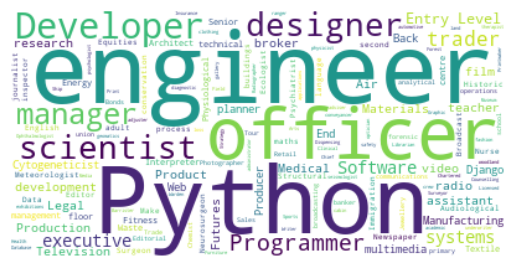

In [26]:
plt.imshow(jobs_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
from PIL import Image
import numpy as np

job_mask = np.array(Image.open('background.png'))

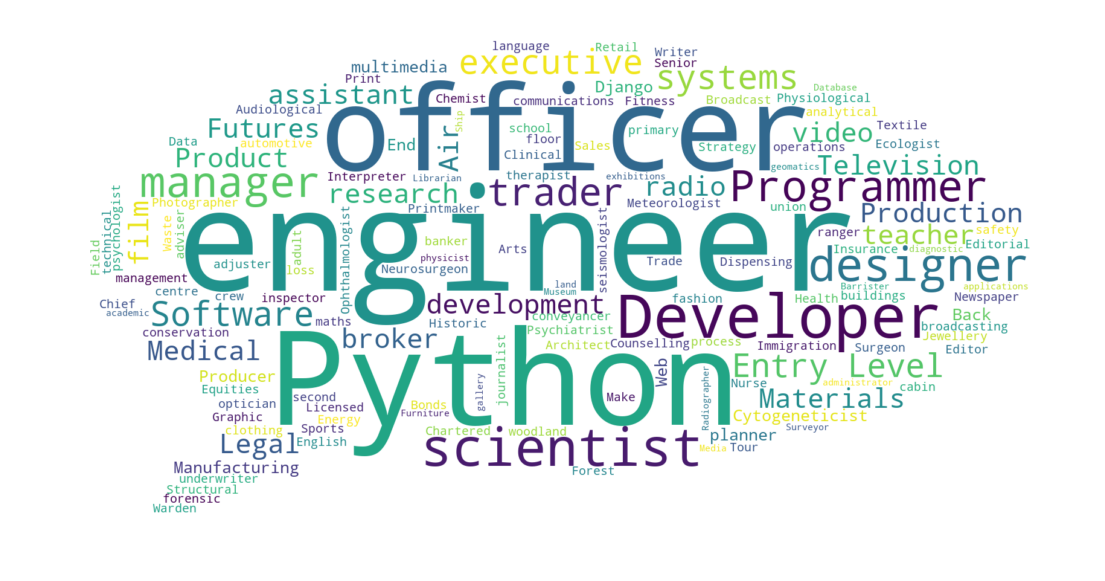

In [28]:
jobs_cloud = WordCloud(background_color='white', max_words=2000, mask=job_mask, stopwords=stopwords)

jobs_cloud.generate(jobs_data)

# display the word cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(jobs_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Se fossimo interessati a salvare tutte le informazioni di ciascun lavoro, nessun problema. Dobbiamo semplicemente estrarre più elementi:

In [29]:
job = soup.findAll("h2")  # ripetiamo per mostrare tutti gli step
company = soup.findAll("h3")
location = soup.findAll(class_="location")
date = soup.findAll("time")

In [30]:
with open("Lavori_full.txt", 'w') as file:
    for index in range(2):  # range(len(job))
        file.write(f"{job[index].getText()}\n\t"
                   f"{company[index].getText()}"
                   f"{location[index].getText()}"
                   f"{date[index].getText()}\n")

***

# 3 Analisi di tabelle html

Le tabelle in html hanno delle strutture molto semplici e chiare da esplorare. Facciamo un esempio rapido:

In [31]:
table = """
<table>
  <tr>
    <td id='flight' >Flight No</td>
    <td>Launch site</td> 
    <td>Payload mass</td>
   </tr>
  <tr> 
    <td>1</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a></td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td>
    <td>80 kg</td>
  </tr>
</table>
"""

%%html
<table>
  <tr>
    <td id='flight' >Flight No</td>
    <td>Launch site</td> 
    <td>Payload mass</td>
   </tr>
  <tr> 
    <td>1</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a></td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td>
    <td>80 kg</td>
  </tr>
</table>

In [32]:
table_bs = bs4.BeautifulSoup(table, "html.parser")

In [33]:
table_rows=table_bs.find_all('tr')
len(table_rows)

4

In [34]:
first_row =table_rows[0]
first_row

<tr>
<td id="flight">Flight No</td>
<td>Launch site</td>
<td>Payload mass</td>
</tr>

In [35]:
first_row_elements = first_row.findAll('td')
len(first_row_elements)

3

In [36]:
print(first_row_elements[0].getText())

Flight No


In [37]:
print(first_row_elements[1].getText())

Launch site


In [38]:
print(first_row_elements[2].getText())

Payload mass


Finora, niente di particolarmente diverso rispetto a prima. E' però interessante osservare dove ci sono dei link esterni:

In [39]:
second_row =table_rows[1]
second_row

<tr>
<td>1</td>
<td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td>
<td>300 kg</td>
</tr>

In [40]:
second_row_elements = second_row.findAll('td')
len(second_row_elements)

3

In [41]:
print(second_row_elements[0].getText())

1


In [42]:
print(second_row_elements[1].getText())

Florida


In [43]:
print(second_row_elements[2].getText())

300 kg


In questo modo, non lo stiamo recuperando. Per farlo, dobbiamo ricercare un attributo href:

In [44]:
link = second_row.findAll('a')
# link = second_row.findAll(href=True)
print(link)

[<a href="https://en.wikipedia.org/wiki/Florida">Florida</a>]


In [45]:
print(link[0]['href'])

https://en.wikipedia.org/wiki/Florida
